In [381]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [382]:
data_amp = pd.read_csv('MPA_fish_out_2004-2023_annuel.csv')
data_atpp = pd.read_csv('ATPP_fish_out_1990-2023_annuel.csv')
data_all = pd.read_csv('fish_out_1983-2023_biannuel.csv')
data_pmana = pd.read_csv('Pmana_poisson_2005-2023_annuel.csv')

In [383]:
data_pmana.rename(columns={'Year':'Date'}, inplace=True)
data_amp.rename(columns={'YearSeason':'Date'}, inplace=True)
data_all.rename(columns={'YearSeason':'Date'}, inplace=True)

In [384]:
data_amp.set_index('Date', inplace=True)
data_atpp.set_index('Date', inplace=True)
data_all.set_index('Date', inplace=True)
data_pmana.set_index('Date', inplace=True)

In [385]:
# normalize
data_amp['Total'] = data_amp['Total'] / data_amp['Total'].max()
data_atpp['Total'] = data_atpp['Total'] / data_atpp['Total'].max()
data_all['Total'] = data_all['Total'] / data_all['Total'].max()
data_pmana['Total'] = data_pmana['Total'] / data_pmana['Total'].max()

In [386]:
data_all.sort_values(by='Date')

,C,Co,H,O,P,Pi,Total
Date,,,,,,,
1983-03-01,0.120354,0.062794,0.340520,0.367025,0.056979,0.052328,0.357281
1983-10-01,0.102998,0.037758,0.235285,0.444884,0.130921,0.048155,0.483148
1987-03-01,0.143558,0.078175,0.273111,0.347203,0.103486,0.054467,0.400461
1987-10-01,0.137415,0.085307,0.191683,0.318156,0.220485,0.046955,0.474846
1988-03-01,0.101830,0.056277,0.210984,0.269247,0.328834,0.032828,0.564757
...,...,...,...,...,...,...,...
2021-10-01,0.306151,0.081174,0.095611,0.170801,0.283231,0.063031,0.242233
2022-03-01,0.212457,0.081227,0.106414,0.215273,0.333464,0.051166,0.227355
2022-10-01,0.265351,0.062216,0.097394,0.252795,0.259101,0.063142,0.235710


<Axes: xlabel='Date'>

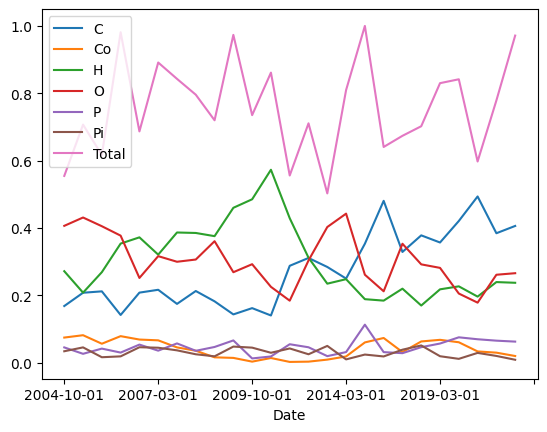

In [387]:
data_amp.plot()

<Axes: xlabel='Date'>

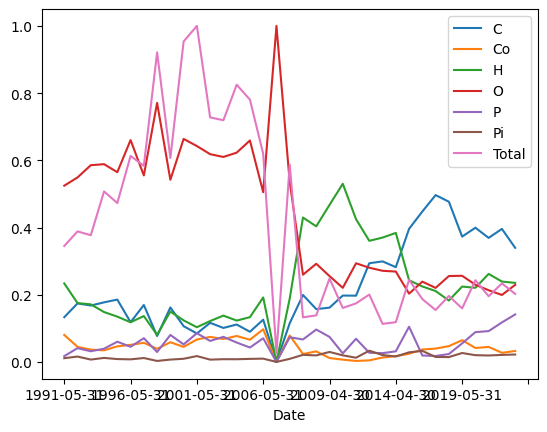

In [388]:
data_atpp.plot()

<Axes: xlabel='Date'>

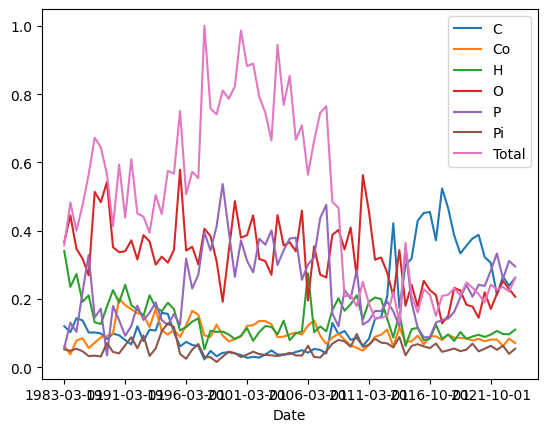

In [389]:
data_all.plot()

<Axes: xlabel='Date'>

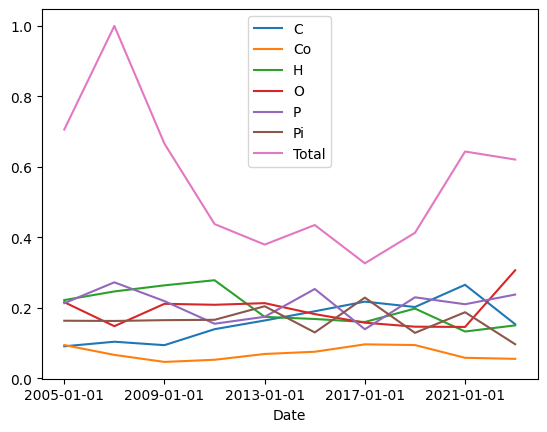

In [390]:
data_pmana.plot()

In [391]:
# rename all columns adding a suffix to identify the data
data_amp.rename(columns=lambda x: x + '_amp', inplace=True)
data_atpp.rename(columns=lambda x: x + '_atpp', inplace=True)
data_all.rename(columns=lambda x: x + '_all', inplace=True)
data_pmana.rename(columns=lambda x: x + '_pmana', inplace=True)

In [392]:
# merge the 3 dataframes on the date column
data = pd.merge(data_all, data_amp, on='Date', how ='outer', sort=True)
data = pd.merge(data, data_atpp, on='Date', how ='outer', sort=True)
data = pd.merge(data, data_pmana, on='Date', how ='outer', sort=True)

In [393]:
data

,C_all,Co_all,H_all,O_all,P_all,Pi_all,Total_all,C_amp,Co_amp,H_amp,...,P_atpp,Pi_atpp,Total_atpp,C_pmana,Co_pmana,H_pmana,O_pmana,P_pmana,Pi_pmana,Total_pmana
Date,,,,,,,,,,,,,,,,,,,,,
1983-03-01,0.120354,0.062794,0.340520,0.367025,0.056979,0.052328,0.357281,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983-10-01,0.102998,0.037758,0.235285,0.444884,0.130921,0.048155,0.483148,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-03-01,0.143558,0.078175,0.273111,0.347203,0.103486,0.054467,0.400461,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987-10-01,0.137415,0.085307,0.191683,0.318156,0.220485,0.046955,0.474846,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988-03-01,0.101830,0.056277,0.210984,0.269247,0.328834,0.032828,0.564757,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,0.265351,0.062216,0.097394,0.252795,0.259101,0.063142,0.235710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.153477,0.055275,0.150239,0.306607,0.23767,0.096732,0.620812
2023-03-01,0.238780,0.083972,0.096683,0.229714,0.311523,0.039328,0.221842,0.406033,0.019788,0.237245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [394]:
# create a list of the columns to merge
C = ['C_amp', 'C_atpp', 'C_all', 'C_pmana']
Co = ['Co_amp', 'Co_atpp', 'Co_all', 'Co_pmana']
P = ['P_amp', 'P_atpp', 'P_all', 'P_pmana']
Pi = ['Pi_amp', 'Pi_atpp', 'Pi_all', 'Pi_pmana']
H = ['H_amp', 'H_atpp', 'H_all', 'H_pmana']
O = ['O_amp', 'O_atpp', 'O_all', 'O_pmana']
Total = ['Total_amp', 'Total_atpp', 'Total_all', 'Total_pmana']
groups = [C, Co, P, Pi, H, O, Total]

In [395]:
data = data.interpolate(method='linear')

<Axes: xlabel='Date'>

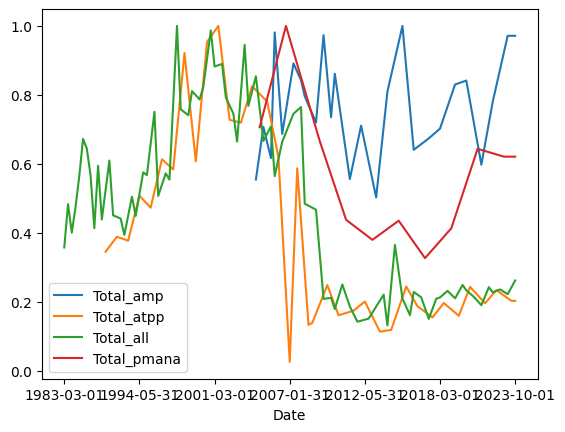

In [396]:
data.plot(y=Total)

### on enlève les relevés chelous

In [397]:
# merge the 3 dataframes on the date column
data = pd.merge(data_all, data_atpp, on='Date', how ='outer', sort=True)

In [398]:
data.reset_index(inplace=True)

In [399]:
# create a list of the columns to merge
C = ['C_atpp', 'C_all']
Co = ['Co_atpp', 'Co_all']
P = ['P_atpp', 'P_all']
Pi = ['Pi_atpp', 'Pi_all']
H = ['H_atpp', 'H_all']
O = ['O_atpp', 'O_all']
Total = ['Total_atpp', 'Total_all']
groups = [C, Co, P, Pi, H, O, Total]

In [400]:
for i in range(len(data)):
    for group in groups:
        # mean per group
        data.loc[i, group[0]] = data.loc[i, group].mean()

In [401]:
# rename the columns
data.rename(columns={'C_atpp' : 'C', 'Co_atpp' : 'Co' ,'P_atpp' : 'P', 'Pi_atpp' : 'Pi', 'H_atpp' : 'H', 'O_atpp' : 'O', 'Total_atpp' : 'Total'}, inplace=True)

In [402]:
data.drop(columns=['C_all', 'Co_all', 'P_all', 'Pi_all', 'H_all', 'O_all', 'Total_all'], inplace=True)

In [403]:
# sort by date
data.sort_values(by=['Date'], inplace=True)

In [404]:
# data.to_csv('FINAL_fish_bar_1983-2023.csv', index=False)

In [405]:
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)

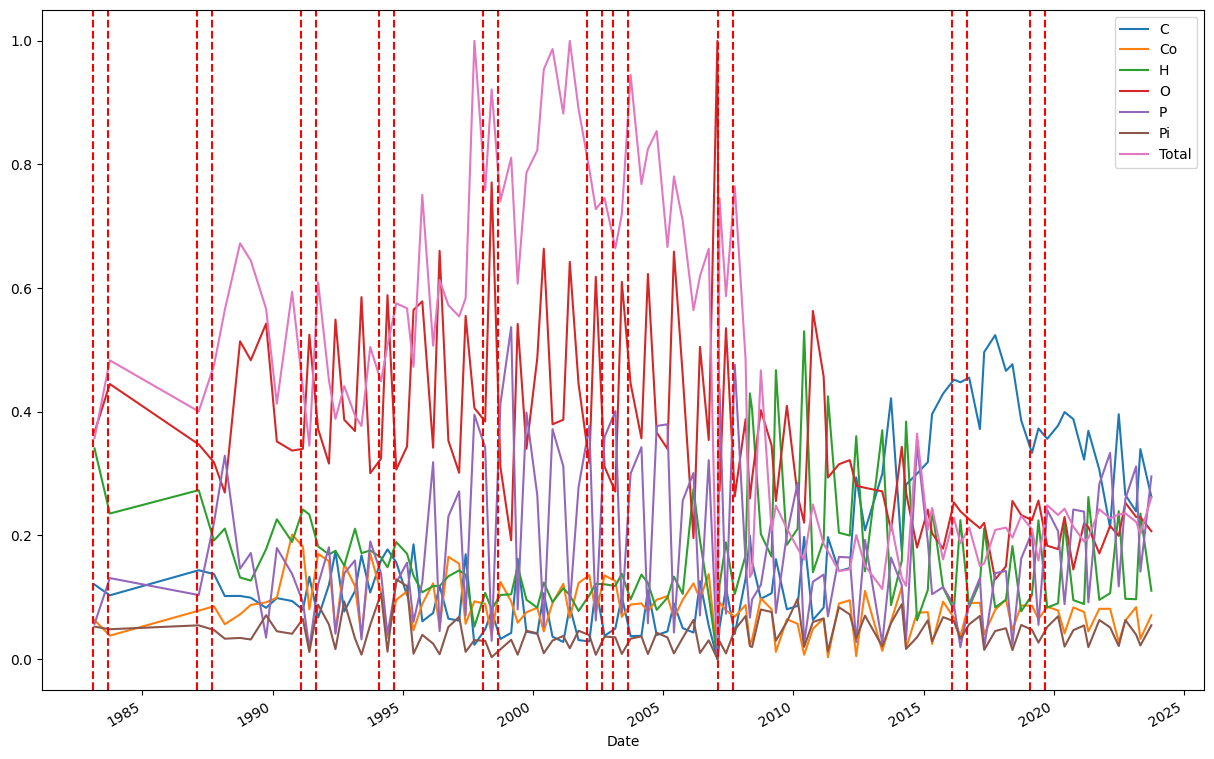

In [406]:
data.plot(figsize=(15, 10))
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for year in list_bleaching:
    plt.axvline(x=year, color='r', linestyle='--')

# Ici total est normalisé par rapport à son max, les autres sont en proportion : pour avoir leur évolution quantitative, multiplier la proportion par le total

In [407]:
# # moyenner les données par année
# data_year = data.copy()
# data_year.reset_index(inplace=True)
# data_year['Year'] = data_year['Date'].astype(str).str[:4]
# data_year.drop(columns=['Date'], inplace=True)
# data_year = data_year.groupby(['Year']).mean()
# data_year.index = pd.to_datetime(data_year.index)

In [408]:
# data_year.plot(y=['Total', 'C', 'Co', 'P', 'Pi', 'H', 'O'], figsize=(15, 10), title='Fish Bar Index')
# # bleaching events list
# list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# # add vertical lines
# for i in list_bleaching:
#     plt.axvline(x=i, color='r', linestyle='--')

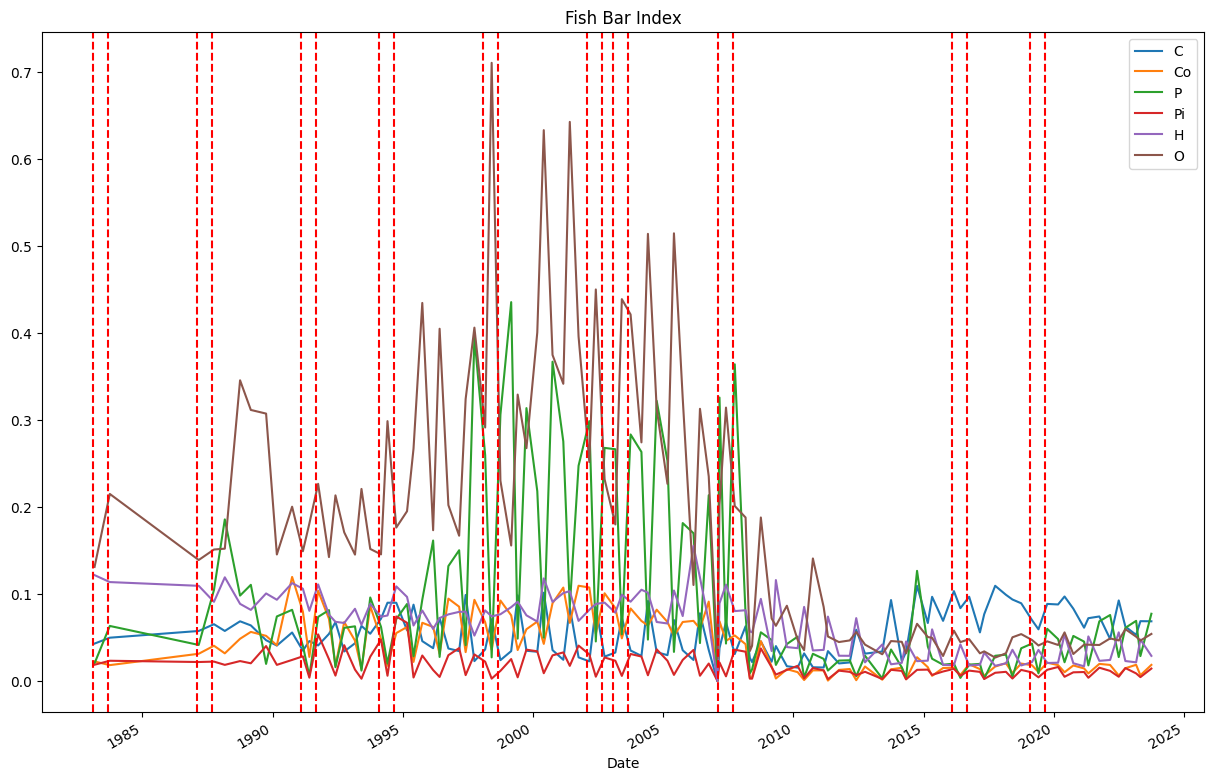

In [409]:
# copy the columns and multiply them by Total to get the actual values and not the proportions
data_abs = data.copy()
data_abs['C'] = data_abs['C'] * data_abs['Total']
data_abs['Co'] = data_abs['Co'] * data_abs['Total']
data_abs['P'] = data_abs['P'] * data_abs['Total']
data_abs['Pi'] = data_abs['Pi'] * data_abs['Total']
data_abs['H'] = data_abs['H'] * data_abs['Total']
data_abs['O'] = data_abs['O'] * data_abs['Total']

data_abs.plot(y=['C', 'Co', 'P', 'Pi', 'H', 'O'], figsize=(15, 10), title='Fish Bar Index')
# bleaching events list
list_bleaching = ['1983-02', '1983-09', '1987-02', '1987-09','1991-02', '1991-09', '1994-02', '1994-09', '1998-02', '1998-09', '2002-02', '2002-09', '2003-02', '2003-09', '2007-02', '2007-09', '2016-02', '2016-09', '2019-02', '2019-09']

# add vertical lines
for i in list_bleaching:
    plt.axvline(x=i, color='r', linestyle='--')

<Axes: title={'center': 'Fish Bar Index'}, xlabel='Date'>

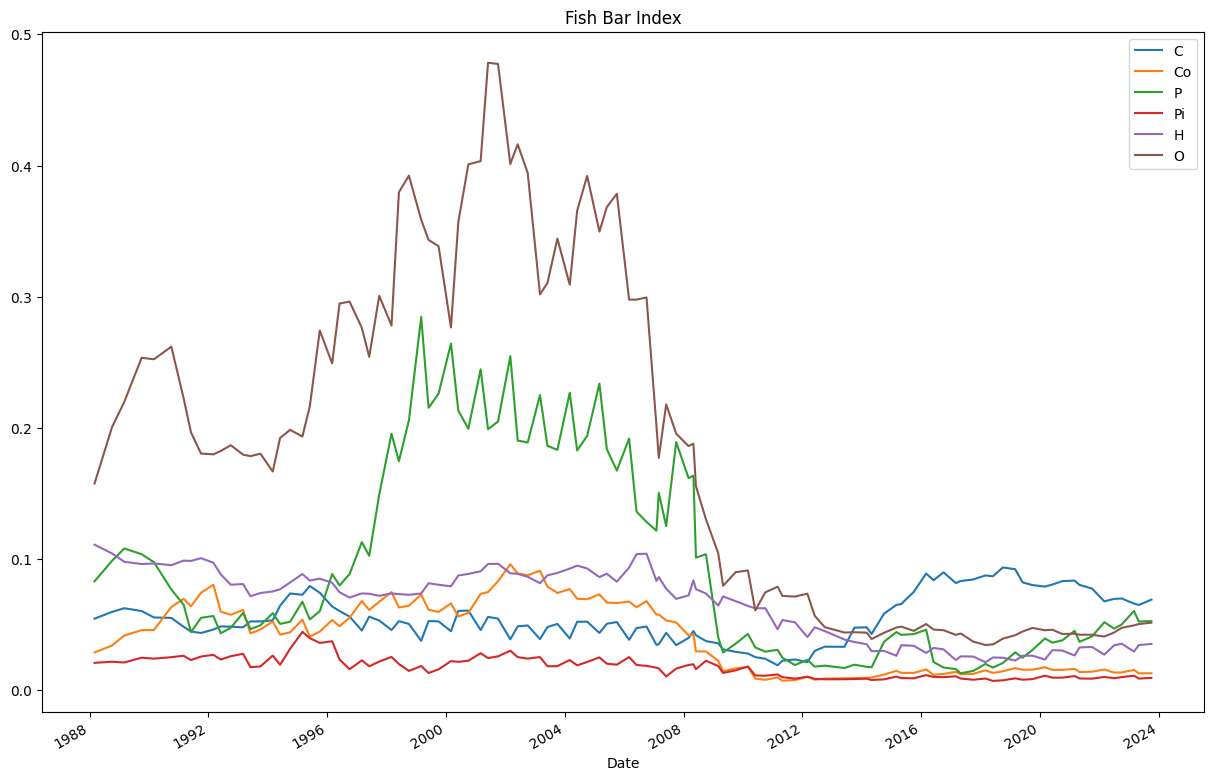

In [410]:
# apply a rolling mean to smooth the curve
data_abs.rolling(window=5).mean().plot(y=['C', 'Co', 'P', 'Pi', 'H', 'O'], figsize=(15, 10), title='Fish Bar Index')

In [411]:
data_abs = data_abs.rolling(window=5).mean()

In [412]:
data_abs.dropna(inplace=True)
data_abs_tot = data_abs['Total']
data_abs.drop(columns=['Total'], inplace=True)

In [413]:
def Shannon(row):
    return -np.sum(row*np.log(row + 1e-10))

In [414]:
data_tot = data['Total']
data.drop(columns=['Total'], inplace=True)

In [415]:
data_shannon = data.apply(Shannon, axis=1)

In [416]:
data

,C,Co,H,O,P,Pi
Date,,,,,,
1983-03-01,0.120354,0.062794,0.340520,0.367025,0.056979,0.052328
1983-10-01,0.102998,0.037758,0.235285,0.444884,0.130921,0.048155
1987-03-01,0.143558,0.078175,0.273111,0.347203,0.103486,0.054467
1987-10-01,0.137415,0.085307,0.191683,0.318156,0.220485,0.046955
1988-03-01,0.101830,0.056277,0.210984,0.269247,0.328834,0.032828
...,...,...,...,...,...,...
2022-06-30,0.395930,0.027195,0.239159,0.199267,0.117554,0.020894
2022-10-01,0.265351,0.062216,0.097394,0.252795,0.259101,0.063142
2023-03-01,0.238780,0.083972,0.096683,0.229714,0.311523,0.039328


In [417]:
# compute a shannon index column
# data_shannon = - data['C'] * np.log(data['C']) - data['Co'] * np.log(data['Co']) - data['P'] * np.log(data['P']) - data['Pi'] * np.log(data['Pi']) - data['H'] * np.log(data['H']) - data['O'] * np.log(data['O'])

<Axes: title={'center': 'Shannon Index'}, xlabel='Date'>

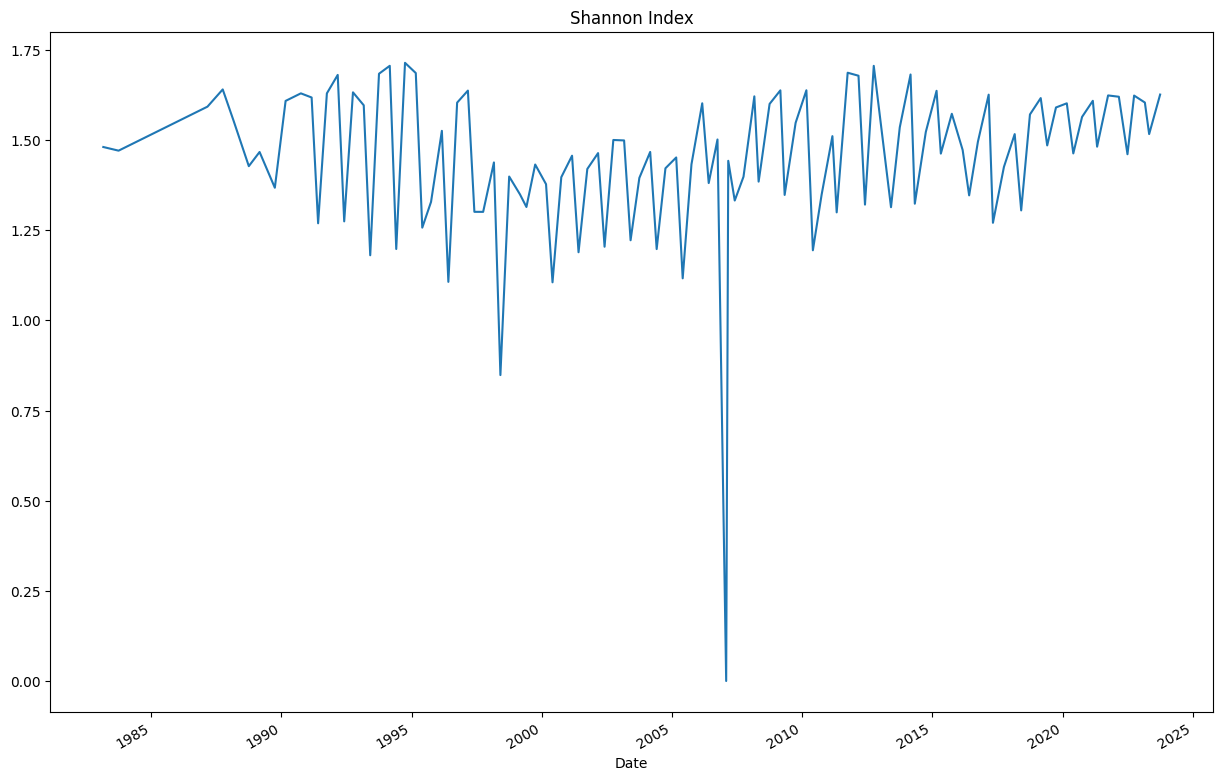

In [418]:
data_shannon.plot(figsize=(15, 10), title='Shannon Index')

In [419]:
def pielou(row):
    return Shannon(row)  / np.log2(np.count_nonzero(row))

In [420]:
pielou = data.apply(pielou, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_27792\3118163278.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return Shannon(row)  / np.log2(np.count_nonzero(row))


<Axes: title={'center': 'Pielou Index'}, xlabel='Date'>

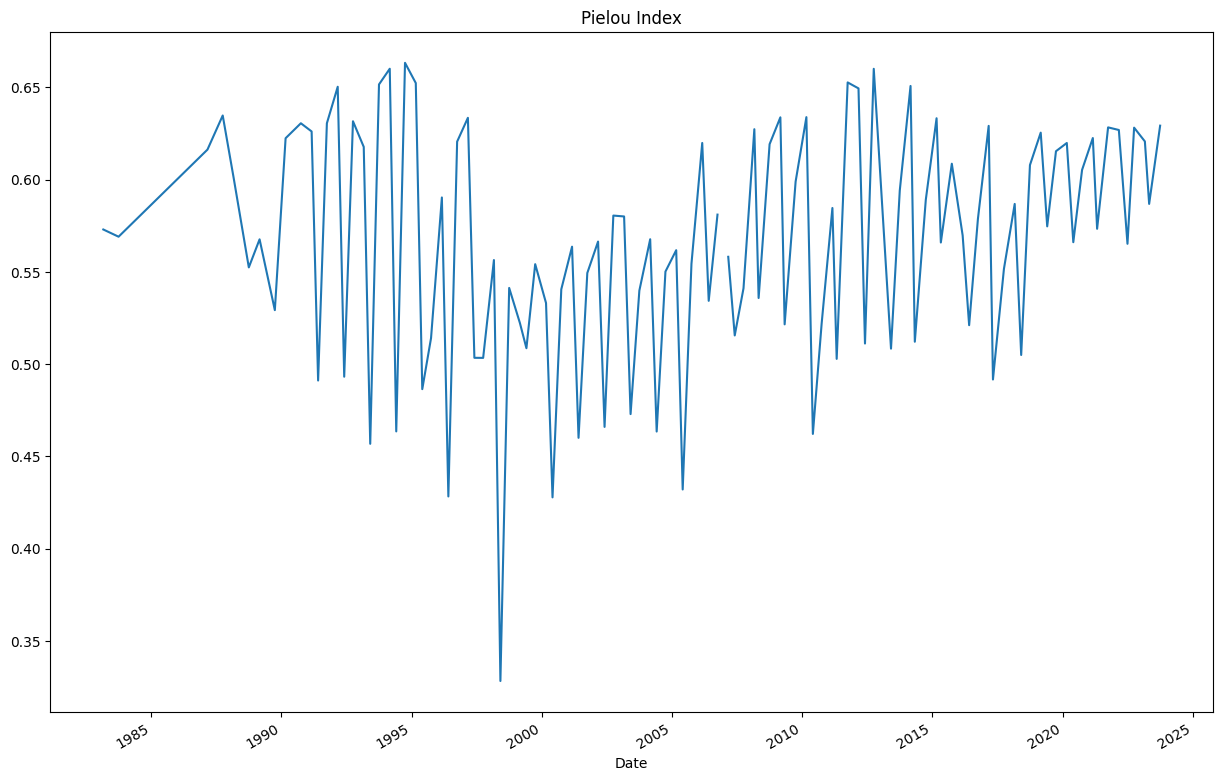

In [421]:
pielou.plot(figsize=(15, 10), title='Pielou Index')

In [422]:
# round values to integers
data_abs = data_abs.round(0).astype(int)

In [423]:
def brillouin(row):
    return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))  

In [424]:
def simpson(row):
    return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))

In [425]:
brillouin = data_abs.apply(brillouin, axis=1)
simpson = data_abs.apply(simpson, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_27792\2682157653.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))
C:\Users\alexi\AppData\Local\Temp\ipykernel_27792\1921702351.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))
C:\Users\alexi\AppData\Local\Temp\ipykernel_27792\1921702351.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))


<Axes: xlabel='Date'>

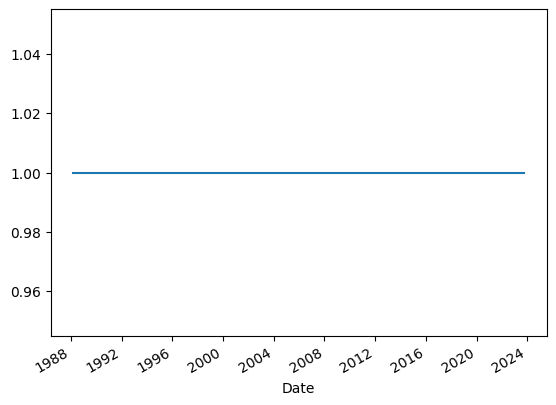

In [426]:
brillouin.plot()

<Axes: xlabel='Date'>

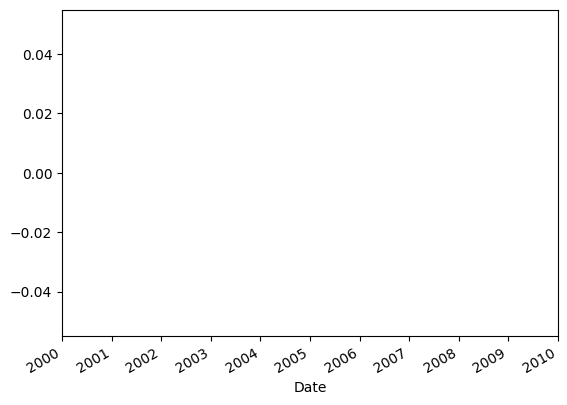

In [427]:
simpson.plot()

In [428]:
data_abs['Total'] = data_abs_tot / data_abs_tot.max()
data_abs['Shannon'] = data_shannon / data_shannon.max()
data_abs['Pielou'] = pielou
data_abs['Brillouin'] = brillouin
data_abs['Simpson'] = simpson

In [429]:
data['Total'] = data_tot / data_tot.max()
data['Shannon'] = data_shannon / data_shannon.max()
data['Pielou'] = pielou
data['Brillouin'] = brillouin
data['Simpson'] = simpson

In [430]:
data.fillna(0, inplace=True)

<Axes: xlabel='Date'>

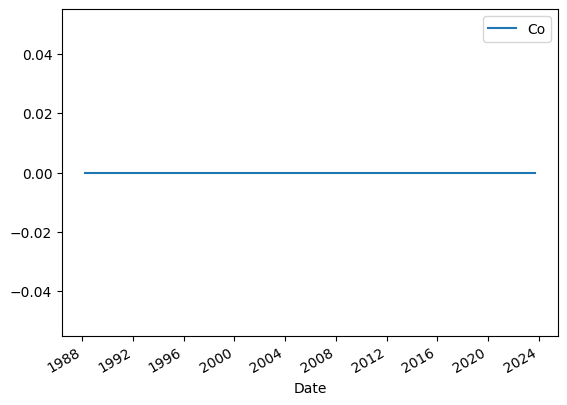

In [431]:
data_abs.plot(y=['Co'])

In [432]:
data.to_csv('fish_indexes.csv', index=True)